In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-02-03 19:51:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.2MB/s    in 2.2s    

2023-02-03 19:51:11 (29.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

print('Contents of base directory: ')
print(os.listdir(base_dir))

print('\nContents of train directory: ')
print(os.listdir(os.path.join(base_dir, 'train')))

print('\nContents of validation directory: ')
print(os.listdir(os.path.join(base_dir, 'validation')))

Contents of base directory: 
['validation', 'train', 'vectorize.py']

Contents of train directory: 
['dogs', 'cats']

Contents of validation directory: 
['dogs', 'cats']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.753.jpg', 'cat.574.jpg', 'cat.853.jpg', 'cat.747.jpg', 'cat.483.jpg']
['dog.660.jpg', 'dog.95.jpg', 'dog.916.jpg', 'dog.711.jpg', 'dog.467.jpg']


In [6]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))

print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

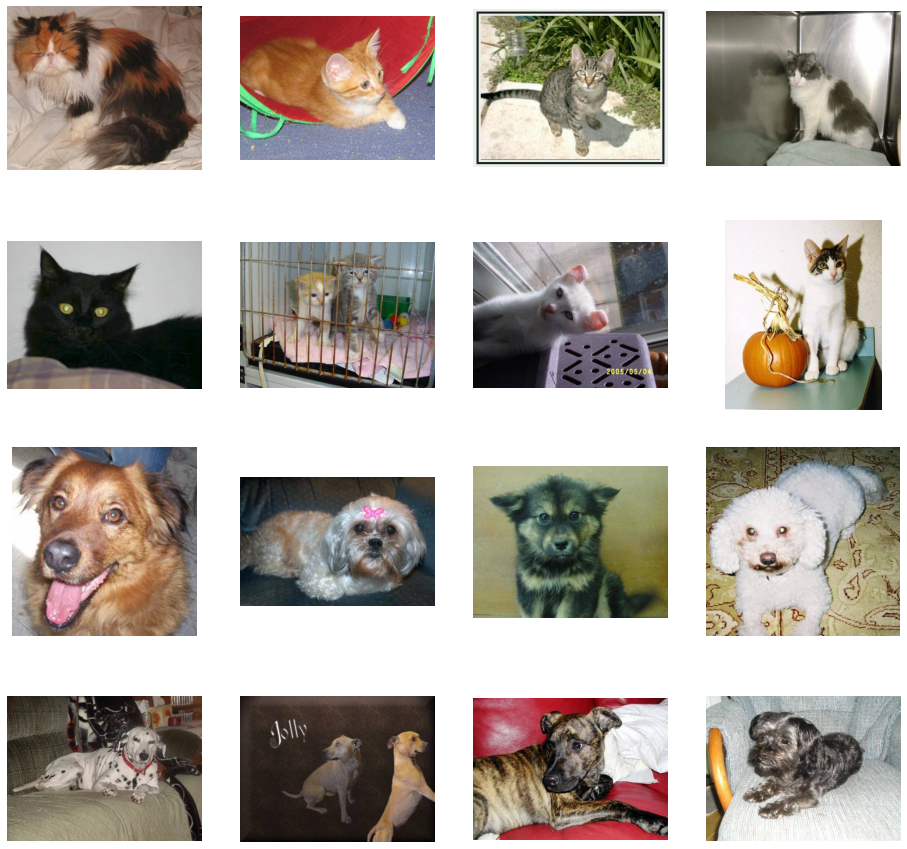

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8

next_cat_pix = [
    os.path.join(train_cats_dir, fname)
    for fname in train_cat_fnames[pic_index-8:pic_index]
]
next_dog_pix = [
    os.path.join(train_dogs_dir, fname)
    for fname in train_dog_fnames[pic_index-8:pic_index]
]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [9]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [10]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
model.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, verbose=2)

Epoch 1/15
100/100 - 19s - loss: 0.7599 - accuracy: 0.5690 - val_loss: 0.6239 - val_accuracy: 0.6710 - 19s/epoch - 186ms/step
Epoch 2/15
100/100 - 9s - loss: 0.5954 - accuracy: 0.6935 - val_loss: 0.6038 - val_accuracy: 0.6550 - 9s/epoch - 93ms/step
Epoch 3/15
100/100 - 8s - loss: 0.5158 - accuracy: 0.7500 - val_loss: 0.5661 - val_accuracy: 0.7070 - 8s/epoch - 83ms/step
Epoch 4/15
100/100 - 9s - loss: 0.4520 - accuracy: 0.7845 - val_loss: 0.5933 - val_accuracy: 0.7050 - 9s/epoch - 93ms/step
Epoch 5/15
100/100 - 10s - loss: 0.3623 - accuracy: 0.8320 - val_loss: 0.7103 - val_accuracy: 0.6500 - 10s/epoch - 100ms/step
Epoch 6/15
100/100 - 10s - loss: 0.2792 - accuracy: 0.8780 - val_loss: 0.7171 - val_accuracy: 0.6980 - 10s/epoch - 100ms/step
Epoch 7/15
100/100 - 8s - loss: 0.1954 - accuracy: 0.9245 - val_loss: 0.7620 - val_accuracy: 0.7130 - 8s/epoch - 82ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1281 - accuracy: 0.9500 - val_loss: 0.9454 - val_accuracy: 0.7240 - 9s/epoch - 92ms/step
Epoch 9

In [21]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print('Dog')
  else:
    print('Cat')



Saving dog.2043.jpg to dog.2043.jpg
1/1 [==============================] - 0s 16ms/step
[0.99517703]
Dog


In [22]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

In [27]:
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

In [28]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs=successive_outputs)

In [30]:
cat_image_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_image_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

In [32]:
img_path = random.choice(cat_image_files + dog_image_files)
img = load_img(img_path,target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1, ) + x.shape)

In [34]:
x /= 255.

In [35]:
successive_feature_maps = visualization_model.predict(x)

1/1 [==============================] - 0s 108ms/step


In [36]:
layer_names = [layer.name for layer in model.layers] 

In [37]:
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1']

<ipython-input-40-c44f44ec47ee>:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


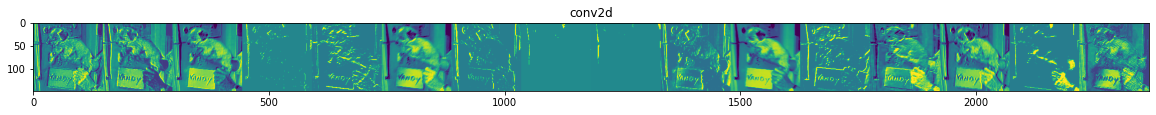

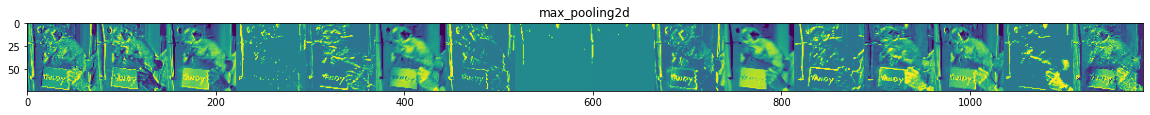

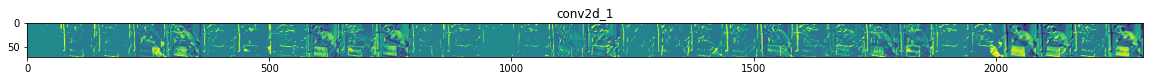

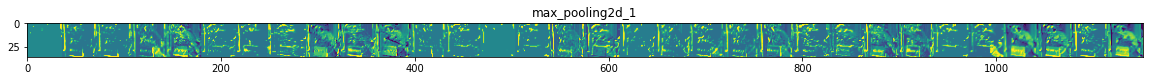

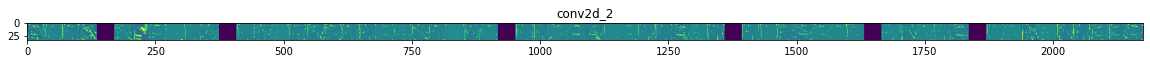

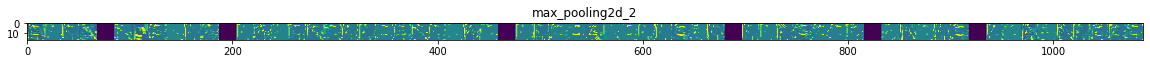

In [40]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 
